In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,073 kB/s)
debconf: unable to initi

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
import pytesseract
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving charlie_chaplin.png to charlie_chaplin.png


In [ ]:
import os
os.getcwd()

'/content'

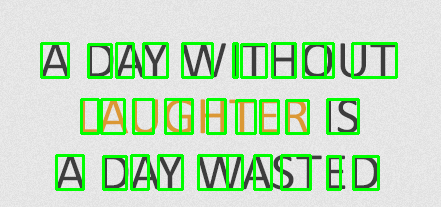

-1

In [ ]:

# read the image and get the dimensions
img = cv2.imread('/content/charlie_chaplin.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# assumes color image
h, w, _ = img.shape
# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img) # also include any config options you use

# # draw the bounding boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# # show annotated image and wait for keypress
cv2_imshow(img)
cv2.waitKey(0)


In [ ]:
extractedInformation = pytesseract.image_to_string(img)
extractedInformation.replace('\n','')

'A DAY! WITHOUTDAUGHTERA DAY WASTED\x0c'

In [ ]:
extractedInformation = pytesseract.image_to_string(img)
f = open('/content/TextFromImg.txt', 'w')
f.write(extractedInformation)
f.close()